# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
#data = pd.read_csv('/datasets/real_estate_data.csv')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
display(data.sample(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12375,20,4412094.0,65.20,2017-03-21T00:00:00,2,NaN,23.0,31.60,12,NaN,...,12.20,0.0,Санкт-Петербург,21978.0,17306.0,0.0,NaN,1.0,379.0,141.0
8996,2,4775000.0,37.60,2018-07-03T00:00:00,1,NaN,19.0,18.60,11,NaN,...,11.30,1.0,Санкт-Петербург,33797.0,14961.0,1.0,1150.0,0.0,NaN,41.0
6720,10,2400000.0,40.40,2017-07-12T00:00:00,1,2.52,5.0,17.07,3,NaN,...,8.60,2.0,деревня Пеники,NaN,NaN,NaN,NaN,NaN,NaN,214.0
18769,0,13850000.0,85.00,2018-03-26T00:00:00,3,2.80,16.0,43.70,4,NaN,...,13.70,2.0,Санкт-Петербург,11819.0,13265.0,0.0,NaN,0.0,NaN,108.0
13868,14,6700000.0,62.00,2018-03-14T00:00:00,2,2.60,14.0,35.00,10,NaN,...,10.00,1.0,Санкт-Петербург,28858.0,11813.0,0.0,NaN,1.0,887.0,35.0
15692,20,22500000.0,173.20,2018-03-14T00:00:00,5,3.00,5.0,125.50,5,NaN,...,13.00,NaN,Санкт-Петербург,23938.0,1943.0,2.0,329.0,3.0,106.0,369.0
23263,8,3600000.0,32.50,2017-10-31T00:00:00,1,NaN,9.0,18.60,8,NaN,...,6.60,NaN,Санкт-Петербург,27604.0,11867.0,2.0,234.0,0.0,NaN,34.0
9388,7,3700000.0,36.00,2017-11-04T00:00:00,1,2.60,25.0,18.00,14,NaN,...,9.00,NaN,Санкт-Петербург,20998.0,22710.0,0.0,NaN,1.0,767.0,38.0
22901,7,2620000.0,39.80,2017-08-04T00:00:00,1,2.50,5.0,17.00,3,NaN,...,NaN,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,153.0
15387,9,1690715.0,30.64,2018-07-01T00:00:00,1,3.00,16.0,12.81,1,NaN,...,7.89,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,95.0


### Вывод

Датасет состоит из 23699 строк и 22 столбцов. Очень много пропусков в столбце с апартаментами.

### Шаг 2. Предобработка данных

Займемся пропусками.

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
data['balcony'] = data['balcony'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))

data.dropna(subset=['locality_name', 'floors_total'], inplace = True)

data['living_area'] = data['living_area'].fillna(data.groupby('locality_name')['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('locality_name')['kitchen_area'].transform('median'))
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['days_exposition'] = data['days_exposition'].fillna(data.groupby('locality_name')['days_exposition'].transform('median'))

data.dropna(subset=['days_exposition', 'living_area', 'ceiling_height', 'kitchen_area'], inplace = True)


Заполним те пропуски, которые можно заполнить логично. 
Например, пропуск в балконах заменяем на 0, а пропуск в цене или в высоте потолка заменяем на медиану по конкретному городу. Не идеально, но лучше, чем запомнить просто средним или константным нулем.

In [5]:
data['is_apartment'].value_counts()


False    2693
True       50
Name: is_apartment, dtype: int64

Слишком много пропусков, нельзя заполнить так, чтобы это не повлияло на исследование.

In [6]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')


Поменяем типы данных. Этажи, балконы и количество ближайших прудов и парков дробными быть не могут, заменим на целые.
Аппартаменты трогать не будем, хотя и написано в задании, что значения - Булевы. Если просто заменять, то все NaN превратятся в True, что, скорее всего, неверно.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20632
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5193
cityCenters_nearest      5193
parks_around3000            0
parks_nearest            5796
ponds_around3000            0
ponds_nearest            5297
days_exposition             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23375 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23375 non-null int64
last_price              23375 non-null float64
total_area              23375 non-null float64
first_day_exposition    23375 non-null object
rooms                   23375 non-null int64
ceiling_height          23375 non-null float64
floors_total            23375 non-null int64
living_area             23375 non-null float64
floor                   23375 non-null int64
is_apartment            2743 non-null object
studio                  23375 non-null bool
open_plan               23375 non-null bool
kitchen_area            23375 non-null float64
balcony                 23375 non-null int64
locality_name           23375 non-null object
airports_nearest        18182 non-null float64
cityCenters_nearest     18182 non-null float64
parks_around3000        23375 non-null int64
parks_nearest           17579 non-null float64
ponds_around3000    

Там где возможно, расстояние до пруда или парка заменим на медиану по городу. Для тех городов, где таких данных нет, оставим как есть. Это было сделано из-за того, что эти данные вносятся на основе географических координат. 0 тоже не подходит, потому что где-то точно будет ближайший парк или водоем.


### Вывод

Мы заменили пропуски там, где могли это сделать максимально логичным образом так, чтобы не повлиять на результаты исследования.

### Шаг 3. Посчитайте и добавьте в таблицу

In [9]:
data['price_for_meter'] = data['last_price'] / data['total_area']
data['date_of_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y.%m.%d') #дата публикации объявления
data['date_of_exposition1'] = data['date_of_exposition'].dt.weekday
data['date_of_exposition2'] = data['date_of_exposition'].dt.month
data['date_of_exposition3'] = data['date_of_exposition'].dt.year


In [10]:
data['этаж'] = data['floors_total'] - data['floor']
data['этаж2'] = data['floor']

def floor(row):
    if 0 == row:
        return 'последний'
    else:
        return 'другой'
def floor2(row):
    if 1 == row:
        return 'первый'
    else:
        return 'другой'
data['этаж'] = data['этаж'].apply(lambda x: floor(x))
data['этаж2'] = data['этаж2'].apply(lambda x: floor2(x))

data['этаж'] = data['этаж'] + data['этаж2']

def floor3(row):
    if 'последний' in row:
        return 'последний'
    elif 'первый' in row:
        return 'первый'
    else:
        return 'другой'
data['этаж'] = data['этаж'].apply(lambda x: floor3(x))
del data['этаж2']

In [11]:
data['living_relation'] = data['living_area'] / data['total_area']
data['kitchen_relation'] = data['kitchen_area'] / data['total_area']
data.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_meter,date_of_exposition,date_of_exposition1,date_of_exposition2,date_of_exposition3,этаж,living_relation,kitchen_relation
23380,6,2800000.0,31.50,2018-02-08T00:00:00,1,2.50,5,31.30,3,NaN,...,850.0,45,88888.888889,2018-02-08,3,2,2018,другой,0.993651,0.314286
4503,10,3980000.0,30.90,2018-03-23T00:00:00,1,2.60,9,15.30,6,NaN,...,755.0,7,128802.588997,2018-03-23,4,3,2018,другой,0.495146,0.265372
19074,8,1150000.0,55.00,2018-06-21T00:00:00,2,2.53,5,29.00,5,NaN,...,NaN,42,20909.090909,2018-06-21,3,6,2018,последний,0.527273,0.163636
2913,8,4190000.0,50.00,2017-08-21T00:00:00,3,2.50,5,35.00,4,NaN,...,592.0,435,83800.000000,2017-08-21,0,8,2017,другой,0.700000,0.150000
5903,11,4600000.0,53.00,2016-04-04T00:00:00,2,2.60,15,25.81,9,NaN,...,NaN,959,86792.452830,2016-04-04,0,4,2016,другой,0.486981,0.183396
8209,14,3400000.0,28.00,2017-09-08T00:00:00,1,2.70,12,31.30,11,NaN,...,503.0,50,121428.571429,2017-09-08,4,9,2017,другой,1.117857,0.178571
23575,15,5750000.0,65.00,2015-07-02T00:00:00,3,2.60,9,42.00,1,NaN,...,503.0,546,88461.538462,2015-07-02,3,7,2015,первый,0.646154,0.153846
14662,9,5950000.0,64.69,2019-04-22T00:00:00,1,2.70,25,17.97,1,NaN,...,NaN,61,91977.121657,2019-04-22,0,4,2019,первый,0.277786,0.533467
11309,20,18900000.0,110.00,2017-08-11T00:00:00,3,3.00,5,31.30,3,NaN,...,437.0,95,171818.181818,2017-08-11,4,8,2017,другой,0.284545,0.090000
18015,7,2300000.0,62.00,2017-06-01T00:00:00,3,2.50,5,43.00,5,False,...,NaN,331,37096.774194,2017-06-01,3,6,2017,последний,0.693548,0.096774


### Вывод

На этом шаге мы посчитали и добавили в таблицу:
1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. варианты этажа квартиры (первый, последний, другой)
4. отношения площадей: жилой к общей, кухни к общей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0889c3410>]],
      dtype=object)

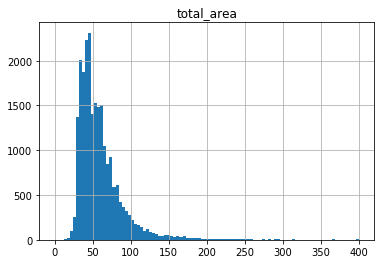

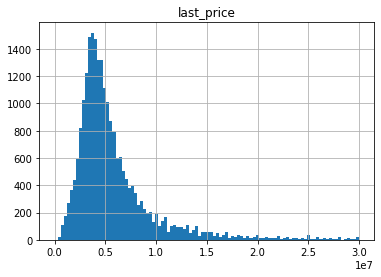

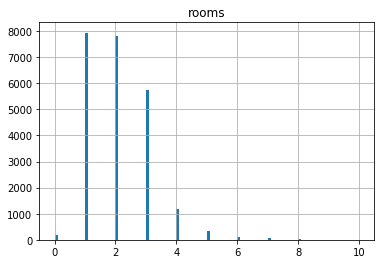

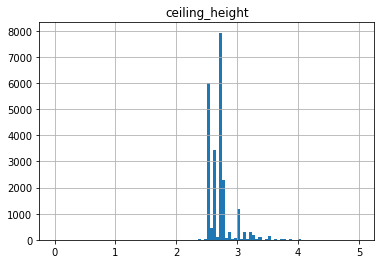

In [12]:
data.hist('total_area', bins = 100, range = (0, 400))
data.hist('last_price', bins = 100, range = (0, 30000000))
data.hist('rooms', bins = 100, range = (0, 10))
data.hist('ceiling_height', bins = 100, range = (0, 5))


Все 4 параметра подчиняются закону распределения Пуассона.

95.0
170.38609625668448


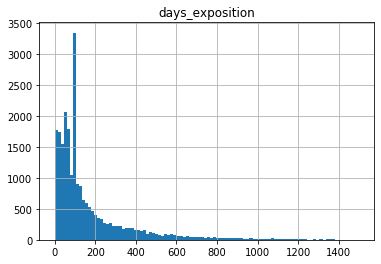

In [13]:
data.hist('days_exposition', bins = 100, range = (0, 1500))
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

Можно заметить пик в значении 95. Это связано со способом заполнения пропусков и дальнейшим округлением в сторону целых дней. Но пиковое значение находится примерно в районе этих дней и в основном большинство сделок проходит в течение этого времени.

(-100, 800)

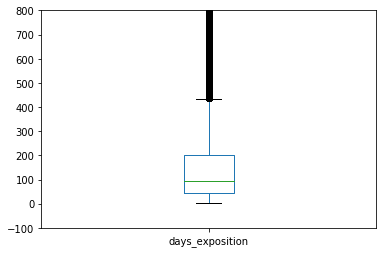

In [14]:
import matplotlib.pyplot as plt
data['days_exposition'].plot.box()
plt.ylim(-100, 800)

In [15]:
q1 = data['days_exposition'].quantile(0.25)
q3 = data['days_exposition'].quantile(0.75)
iqr = q3 - q1
print(q3 + 1.5*iqr)

435.0


In [16]:
q1

45.0

Для дальнейшего изучения построим межквартильное распределение:
Все значения больше 435 можно считать выбросами, то есть квартиры продаются слишком долго.
Если квартира продается меньше 45 дней, то можно считать, что квартира продалась быстро.

0.6538317956658533


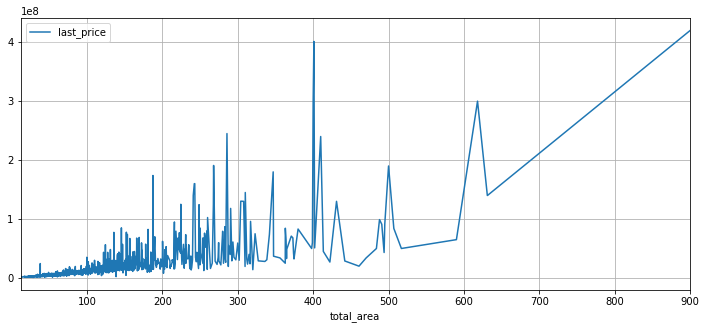

In [17]:
data.pivot_table(index = 'total_area', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['total_area'].corr(data['last_price']))

0.3637703505624778


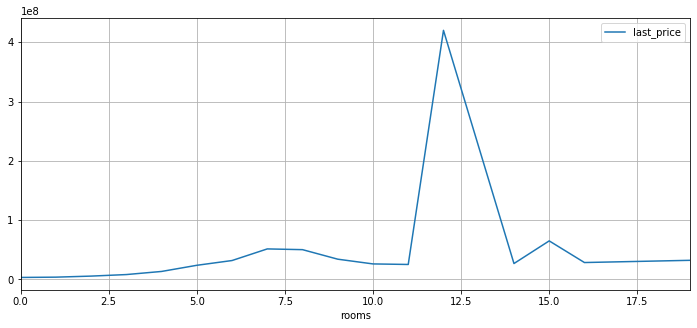

In [18]:
data.pivot_table(index = 'rooms', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['rooms'].corr(data['last_price']))

-0.20667716148691737


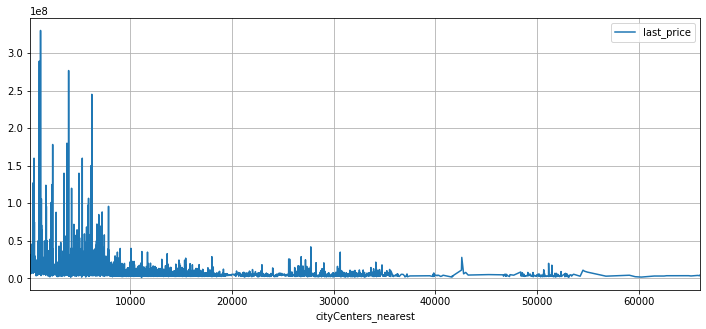

In [19]:
data.pivot_table(index = 'cityCenters_nearest', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['cityCenters_nearest'].corr(data['last_price']))

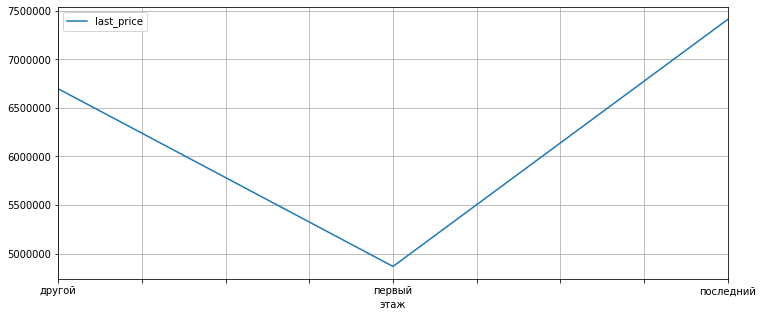

In [20]:
data.pivot_table(index = 'этаж', values = 'last_price').plot(grid = True, figsize = (12, 5))

0.001639947218618622


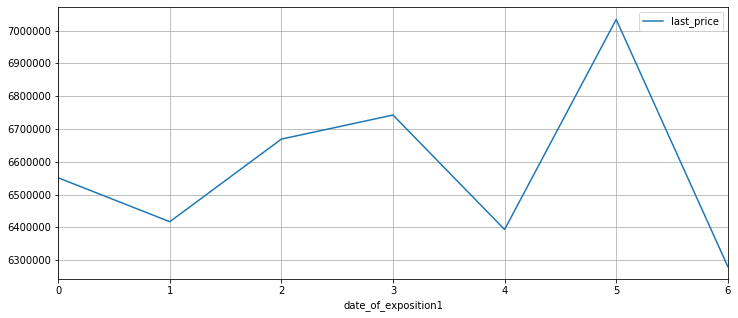

In [21]:
data.pivot_table(index = 'date_of_exposition1', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['date_of_exposition1'].corr(data['last_price']))

0.0023880282584840874


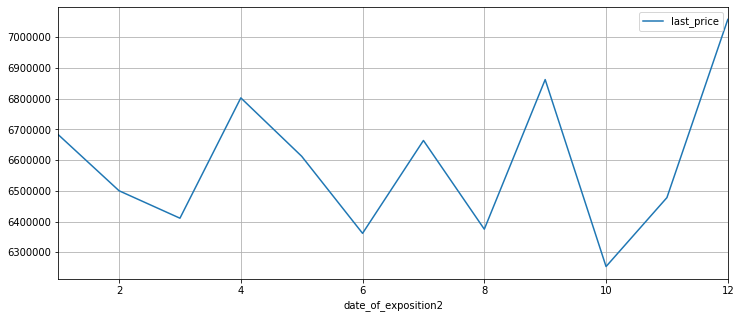

In [22]:
data.pivot_table(index = 'date_of_exposition2', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['date_of_exposition2'].corr(data['last_price']))

-0.04160704660361959


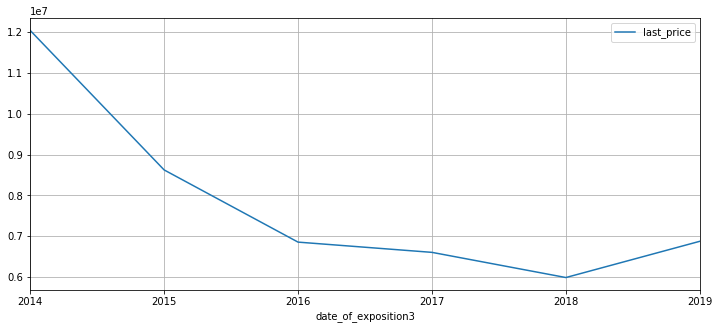

In [23]:
data.pivot_table(index = 'date_of_exposition3', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['date_of_exposition3'].corr(data['last_price']))

### Вывод

После построения гистограмм и изучения коэффициента корреляции можно понять, от чего зависит цена квартиры:
1. Чем больше комнат, тем дороже квартира;
2. Чем дальше от центра, тем дешевле жилье;
3. Квартиры на первом этаже обычно дешевле, чем на других этажах;
4. А вот от даты выставления квартиры цена не особо сильно зависит.

In [24]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [25]:
data.pivot_table(index='locality_name', values=['price_for_meter', 'last_price'], aggfunc={'last_price':'count', 'price_for_meter':'mean'})\
.rename(columns={'last_price':'top', 'price_for_meter':'mean_square'}).sort_values('top', ascending=False).head(10).sort_values('mean_square', ascending=False)

,top,mean_square
locality_name,,
Санкт-Петербург,15651,114868.877341
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
посёлок Парголово,327,90175.913458
посёлок Мурино,520,85673.259928
посёлок Шушары,439,78551.344545
Колпино,338,75424.579098
Гатчина,307,68746.146763
Всеволожск,398,68654.473986


Из самых популярных городов: самый дорогой метр жилья -  в Санкт-Петербурге, а самый дешевый - в Выборге.

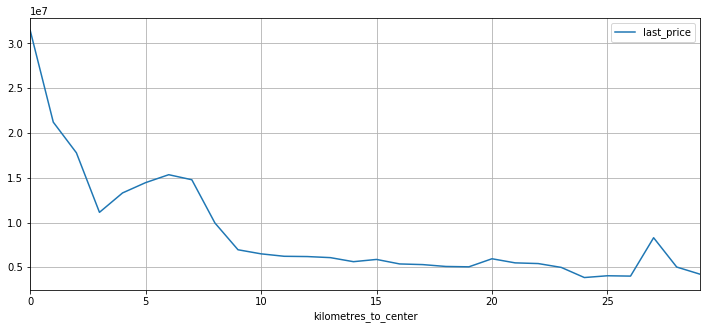

In [26]:
data['kilometres_to_center'] = data['cityCenters_nearest'] * 0.001
data['kilometres_to_center'] = data['kilometres_to_center'].round(0)
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='kilometres_to_center', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

Из гистограммы можно увидеть, что центральный район находится примерно в радиусе 7 км от географического центра Санкт-Петербурга

In [28]:
data_piter_center = data.query('locality_name == "Санкт-Петербург" and kilometres_to_center <= 7')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd088b70d90>]],
      dtype=object)

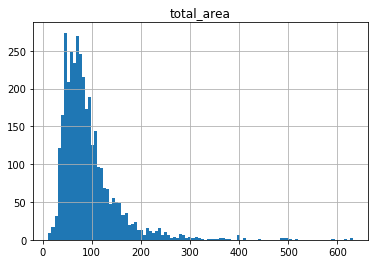

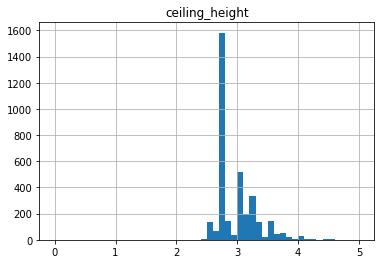

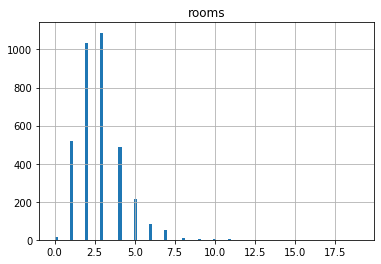

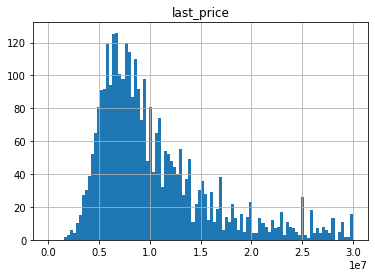

In [29]:
data_piter_center.hist('total_area', bins=100)
data_piter_center.hist('ceiling_height', bins=50, range = (0, 5))
data_piter_center.hist('rooms', bins=100)
data_piter_center.hist('last_price', bins=100, range = (0, 30000000))

Для центра Питера тоже выполняются законы распределения Пуассона

-0.040815066753156166


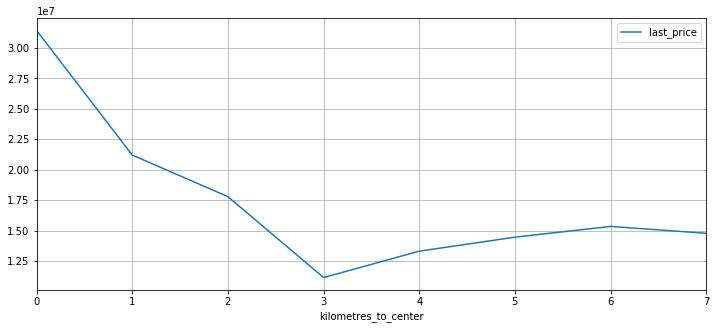

0.3148077030213493


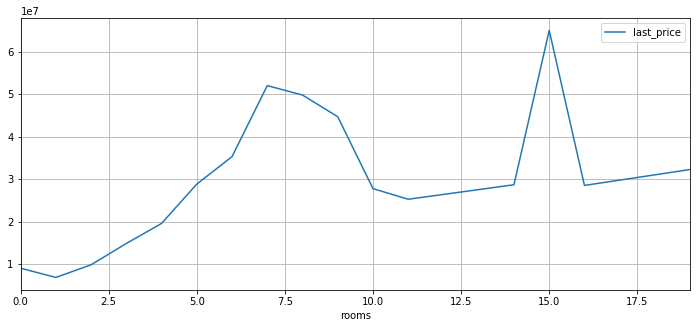

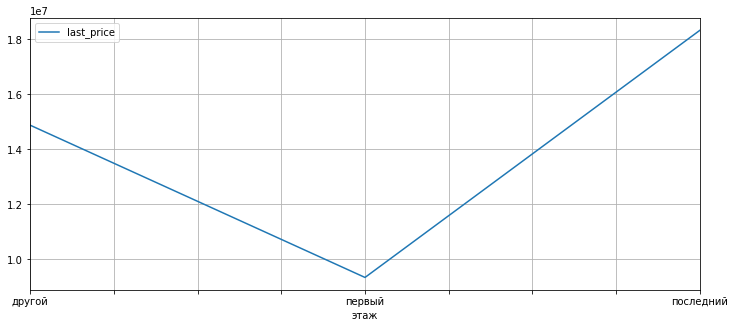

-0.04671648167718656


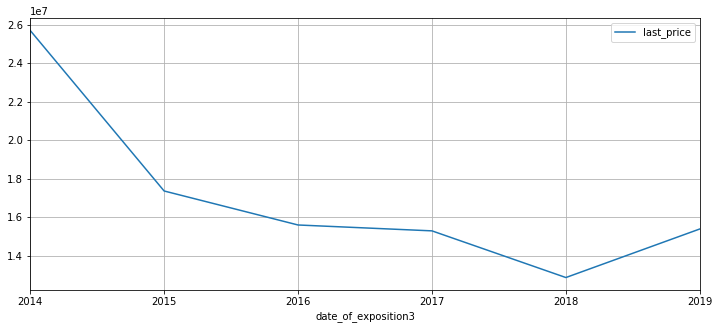

In [36]:

data_piter_center.pivot_table(index='kilometres_to_center', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter_center['kilometres_to_center'].corr(data_piter_center['last_price']))
plt.show()
data_piter_center.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter_center['rooms'].corr(data_piter_center['last_price']))
plt.show()
data_piter_center.pivot_table(index='этаж', values='last_price').plot(grid=True, figsize=(12, 5))

plt.show()
data_piter_center.pivot_table(index='date_of_exposition3', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter_center['date_of_exposition3'].corr(data_piter_center['last_price']))

-0.25756998074710297


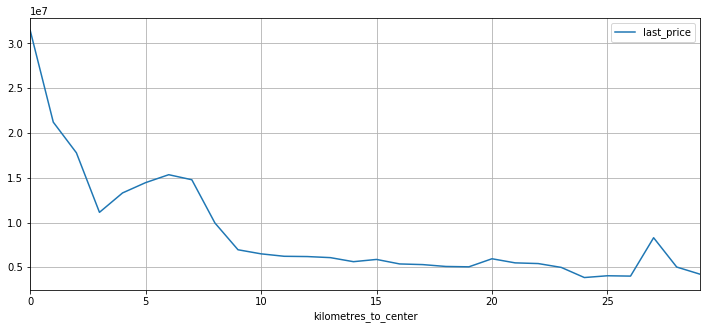

0.37210801137447835


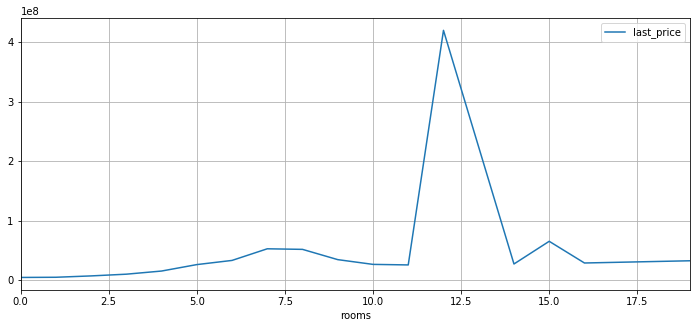

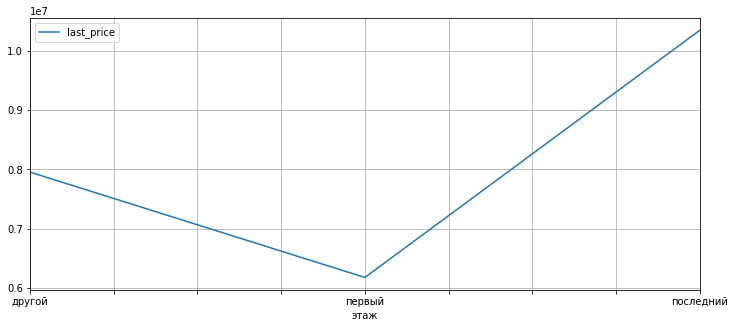

-0.04460279546140352


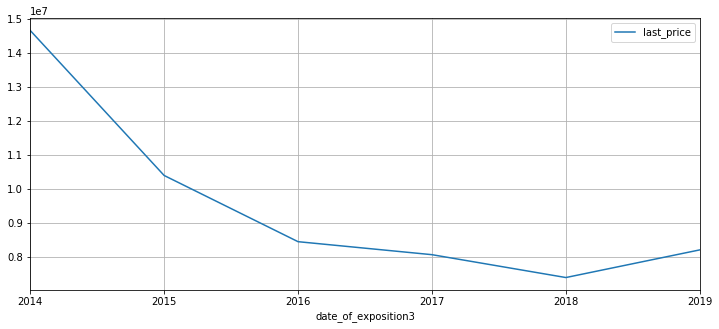

In [35]:
data_piter = data.query('locality_name == "Санкт-Петербург"')
data_piter.pivot_table(index='kilometres_to_center', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter['kilometres_to_center'].corr(data_piter['last_price']))
plt.show()
data_piter.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter['rooms'].corr(data_piter['last_price']))
plt.show()
data_piter.pivot_table(index='этаж', values='last_price').plot(grid=True, figsize=(12, 5))

plt.show()
data_piter.pivot_table(index='date_of_exposition3', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter['date_of_exposition3'].corr(data_piter['last_price']))

### Вывод

Интересно заметить, что для центрального района Питера не так важна удаленность от географического центра. Главное - это просто быть в этом центральном районе. В масштабах всего города удаленность представляет гораздо большее значение.
Количество комнат что в центре, что на окраине, будет влиять прямопропорционально цене на квартиру.
Квартиры на первом этаже дешевле вне зависимости от района
Дата выставления объявления практически не влияет на цену квартиры.

### Шаг 5. Общий вывод

Для ответа на главный вопрос исследования, была проведена подготовка исходного датасета к исследованию.

Были заполнены пропуски на медианные значения по каждму городу там, где это возможно. Некоторые пропуски заполнить было невозможно, например удаленность от центра города, парка и водоема. Возможно в системе не было координат для некоторых населенных пунктов.

Привели к целочисленному типу те величины, которые обычно исчисляются в целых числах.

К датасету были добавлены такие важные параметры как: цена за квадратный метр, отношение жилой площади к общей и отношение площади кухни к общей. Также были добавлены день недели, месяц и год публикации объявления.

Были изучены и построены гистограммы для площади квартир, их цены, количества комнат и высоты потолков.

По итогам исследования мы пришли к выводу, что цена квартиры зависит от количества комнат, расстояния до центра и этажа.
Мы выделили 10 самых популярных городов в плане публикаций объявлений и пришли к выводу, что самая дорогая недвижимость находится в Питере.
Мы смогли выделить центральный район Питера и понять, от каких параметров зависит цена квартиры внутри этого района. После сравнения этих закономерностей с закономерностями для всего города мы выяснили, что для центрального района не так важна непосредственная близость к георграфическому центру города. 